<a href="https://colab.research.google.com/github/hirokimituya/book_stock-price-analysis/blob/main/ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from IPython.core.display import update_display
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-02-21 22:16:28--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-21 22:16:28--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-21 22:16:28--  http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl.sour

In [6]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader(f'{code}.JP', 'stooq').sort_index()
  return df

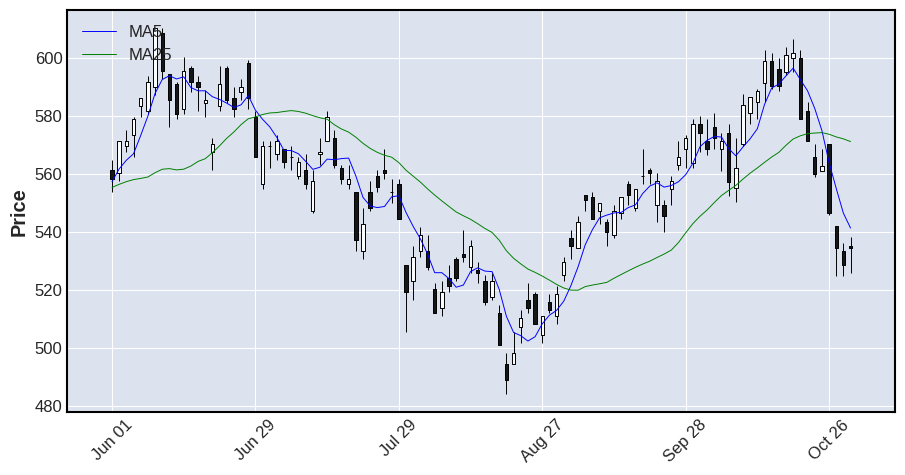

In [7]:
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(4902)   # コニカミノルタ
close = df['Close']

df['ma5'] = ta.SMA(close, timeperiod=5)
df['ma25'] = ta.SMA(close, timeperiod=25)

rdf = df[dt.datetime(2021, 6, 1):dt.datetime(2021, 10, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
fig.show()

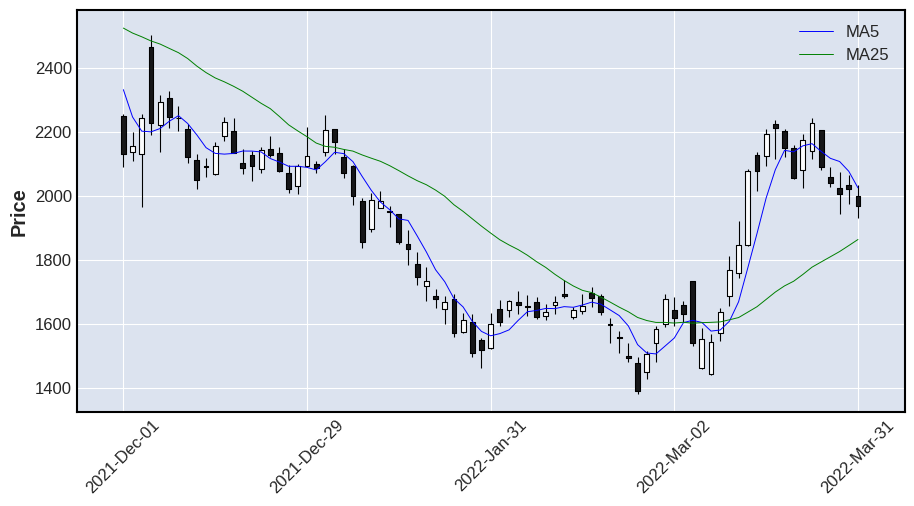

In [9]:
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(2929)   # ファーマーズ
close = df['Close']

df['ma5'] = ta.SMA(close, timeperiod=5)
df['ma25'] = ta.SMA(close, timeperiod=25)

rdf = df[dt.datetime(2021, 12, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
fig.show()

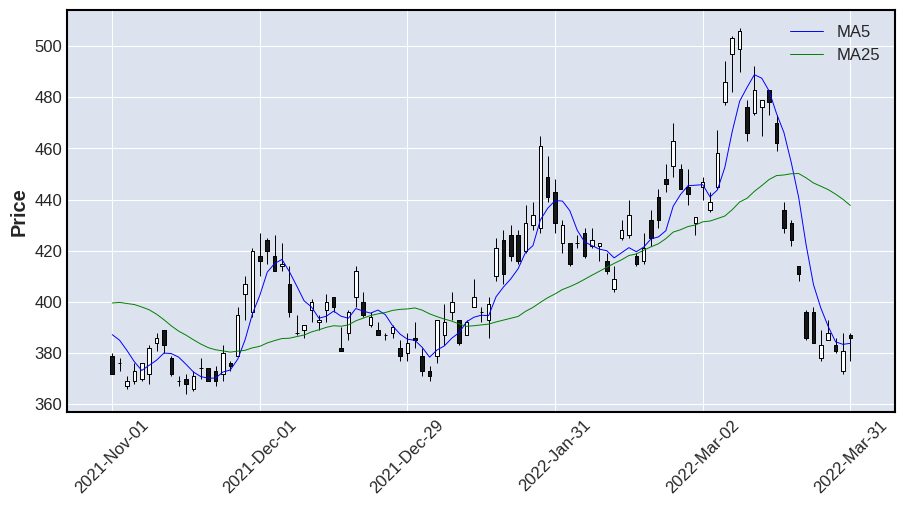

In [10]:
"""デッドクロスについて"""
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(1357)   # ダブルインバース
close = df['Close']

df['ma5'] = ta.SMA(close, timeperiod=5)
df['ma25'] = ta.SMA(close, timeperiod=25)

rdf = df[dt.datetime(2021, 11, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
fig.show()

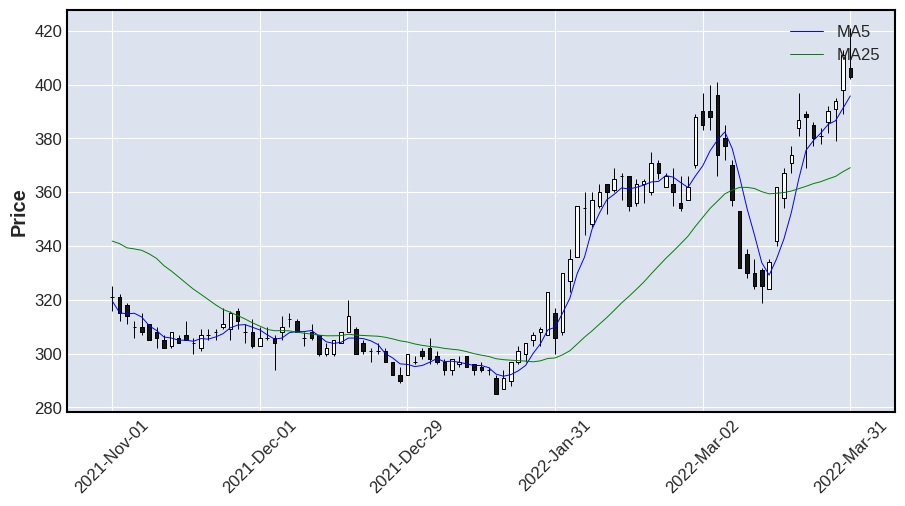

In [11]:
"""ゴールデンクロスの理想的な例"""
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(9501)   # 東京電力ホールディングス
close = df['Close']

df['ma5'] = ta.SMA(close, timeperiod=5)
df['ma25'] = ta.SMA(close, timeperiod=25)

rdf = df[dt.datetime(2021, 11, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
fig.show()

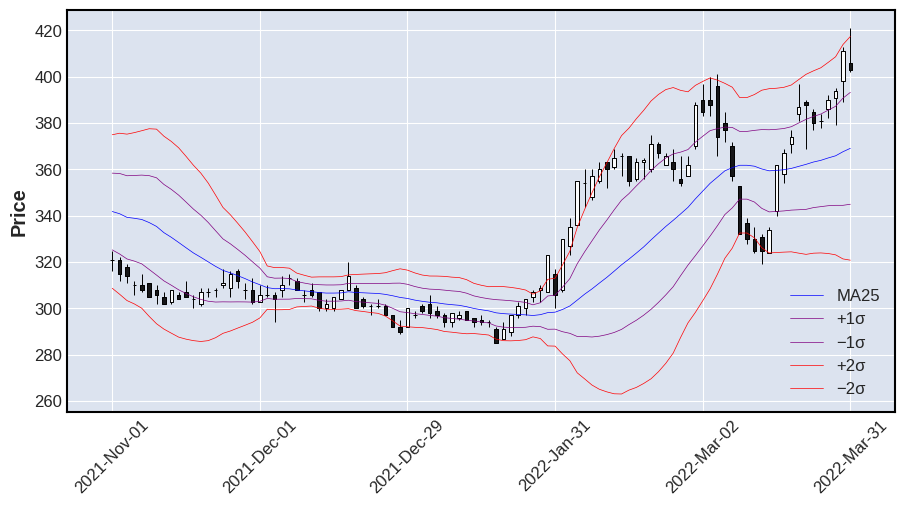

In [15]:
"ボリンジャーバンドを表示してバンドウォークを確認"""
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(9501)   # 東京電力ホールディングス
close = df['Close']

# 25日移動平均線
df['ma25'] = ta.SMA(close, 25)

# ボリンジャーバンド ±1σ ±2σ
df['upper1'], _, df['lower1'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df['upper2'], _, df['lower2'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

rdf = df[dt.datetime(2021, 11, 1):dt.datetime(2022, 3, 31)]
apd = [
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='blue', width=0.5),
    # ボリンジャーバンド ＋1σ
    mpf.make_addplot(rdf['upper1'], color='purple', width=0.5),
    # ボリンジャーバンド −1σ
    mpf.make_addplot(rdf['lower1'], color='purple', width=0.5),
    # ボリンジャーバンド ＋2σ
    mpf.make_addplot(rdf['upper2'], color='red', width=0.5),
    # ボリンジャーバンド −2σ
    mpf.make_addplot(rdf['lower2'], color='red', width=0.5)
]

# ラベルを付けてチャートを表示
fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA25', '+1σ', '−1σ', '+2σ', '−2σ'])
fig.show()

In [16]:
"""5日移動平均と25日移動平均を比較"""
df = get_stock_data(5401)   # 日本製鉄
close = df['Close']

df['ma5'] = ta.SMA(close, timeperiod=5)
df['ma25'] = ta.SMA(close, timeperiod=25)

cross = df['ma5'] > df['ma25']  # 5日移動平均と25日移動平均の比較
df['cross'] = cross
df

,Open,High,Low,Close,Volume,ma5,ma25,cross
Date,,,,,,,,
2018-02-22,2189.72,2192.72,2160.54,2170.40,3.197663e+06,NaN,NaN,False
2018-02-23,2184.57,2230.06,2179.85,2226.63,4.008031e+06,NaN,NaN,False
2018-02-26,2248.95,2263.97,2237.36,2254.10,4.460513e+06,NaN,NaN,False
2018-02-27,2268.68,2285.87,2250.23,2281.57,3.846680e+06,NaN,NaN,False
2018-02-28,2246.36,2252.38,2194.44,2194.44,6.840471e+06,2225.428,NaN,False
...,...,...,...,...,...,...,...,...
2023-02-14,2851.00,2904.00,2846.00,2889.50,2.025360e+07,2761.600,2659.62,True
2023-02-15,2932.00,2964.00,2922.50,2956.00,1.998910e+07,2825.700,2679.66,True
2023-02-16,2984.50,3009.00,2953.00,2988.50,2.056110e+07,2890.900,2700.48,True


In [18]:
"""ゴールデンクロスとデッドクロスの発生日の検出"""

cross_shift = cross.shift(1)

# ゴールデンクロスの発生日
temp_gc = (cross != cross_shift) & (cross == True)

# デッドクロスの発生日
temp_dc = (cross != cross_shift) & (cross == False)